# Ref:
## SIFT
1. [YouTube Video] Feature detection (SIFT, SURF, ORB) – OpenCV 3.4 with python 3 Tutorial 25
    * https://www.youtube.com/watch?v=USl5BHFq2H4

2. [YouTube Video] Feature Detection and Matching + Image Classifier Project | OPENCV PYTHON 2020
    * https://www.youtube.com/watch?v=nnH55-zD38I
    
    
## Matching
1. [YouTube Video] Computing Homography | Image Stitching
    * https://www.youtube.com/watch?v=l_qjO4cM74o
2. [YouTube Video] 3x3 Image Transformations | Image Stitching
    * https://www.youtube.com/watch?v=B8kMB6Hv2eI
3. [Stach Overflow] How to get pixel coordinates from Feature Matching in OpenCV Python
    * https://stackoverflow.com/questions/30716610/how-to-get-pixel-coordinates-from-feature-matching-in-opencv-python
    
## Homography
1. [Doc] Feature Matching + Homography to find Objects
    * https://www.programcreek.com/python/?CodeExample=find+homography

In [1]:
def Plot_KP(IMG, KP, NAME):
    KP_IMG = cv.drawKeypoints(IMG, KP, None)
    cv.imshow(NAME, KP_IMG)
    cv.waitKey(0)
    cv.destroyAllWindows()

In [2]:
def find_good_match_and_draw(BM, img1, kp1, des1, img2, kp2, des2):
        
    good = []
    for m, n in BM:
        if m.distance < 0.75 * n.distance:
            good.append([m])
            
    img_plot = cv.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags=2)
    cv.imshow("Draw Matches", img_plot)
    cv.waitKey(0)
    cv.destroyAllWindows()

In [3]:
def findHomography(image_1_kp, image_2_kp, matches):
    image_1_points = np.zeros((len(matches), 1, 2), dtype=np.float32)
    image_2_points = np.zeros((len(matches), 1, 2), dtype=np.float32)

    for i in range(0,len(matches)):      
        image_1_points[i] = image_1_kp[matches[i][0].queryIdx].pt
        image_2_points[i] = image_2_kp[matches[i][0].trainIdx].pt

    homography, mask = cv.findHomography(image_1_points, image_2_points, cv.RANSAC, ransacReprojThreshold=2.0)

    return homography

In [20]:
def Warp_and_Plot(Book_IMG, Scene_IMG, homography):

    im_rgb = cv.cvtColor(Book_IMG, cv.COLOR_BGR2RGB)
    
    im_dst = cv.warpPerspective(im_rgb, homography, (Scene_IMG.shape[1], Scene_IMG.shape[0]))
    plt.figure(figsize=(10,8))
    plt.imshow(im_dst)
    plt.axis("off")
    plt.show()

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

###########################
# Set path to the images #
###########################

PATH_To_Book1 = "../Data/Hw5/scene/book1.jpg"
PATH_To_Book2 = "../Data/Hw5/scene/book2.jpg"
PATH_To_Book3 = "../Data/Hw5/scene/book3.jpg"
PATH_To_Scene  = "../Data/Hw5/scene/scene.jpg"

In [6]:
###############
# Read Images #
###############

Book1_IMG = cv.imread(PATH_To_Book1)
Book2_IMG = cv.imread(PATH_To_Book2)
Book3_IMG = cv.imread(PATH_To_Book3)
Scene_IMG = cv.imread(PATH_To_Scene)

In [14]:
#######################################
# Use SIFT of SRUF to find key points #
#######################################

mode = "SIFT"
#mode = "SURF"

if mode == "SIFT":
    sift = cv.xfeatures2d.SIFT_create()
    
    Book1_KP, Book1_DES = sift.detectAndCompute(Book1_IMG, None)
    Book2_KP, Book2_DES = sift.detectAndCompute(Book2_IMG, None)
    Book3_KP, Book3_DES = sift.detectAndCompute(Book3_IMG, None)
    Scene_KP, Scene_DES = sift.detectAndCompute(Scene_IMG, None)

elif mode == "SURF":    
    surf = cv.xfeatures2d.SURF_create()
    
    Book1_KP, Book1_DES = surf.detectAndCompute(Book1_IMG, None)
    Book2_KP, Book2_DES = surf.detectAndCompute(Book2_IMG, None)
    Book3_KP, Book3_DES = surf.detectAndCompute(Book3_IMG, None)
    Scene_KP, Scene_DES = surf.detectAndCompute(Scene_IMG, None)

print("Number of Key Points in Book1 is ", len(Book1_KP))
print("Number of Key Points in Book2 is ", len(Book2_KP))
print("Number of Key Points in Book3 is ", len(Book3_KP))
print("Number of Key Points in Scene is ", len(Scene_KP))

Number of Key Points in Book1 is  969
Number of Key Points in Book2 is  1650
Number of Key Points in Book3 is  1010
Number of Key Points in Scene is  3295


In [15]:
###################
# Draw Key Points #
###################

Plot_KP(Book1_IMG, Book1_KP, "Book1_KP")
Plot_KP(Book2_IMG, Book2_KP, "Book2_KP")
Plot_KP(Book3_IMG, Book3_KP, "Book3_KP")
Plot_KP(Scene_IMG, Scene_KP, "Scene_KP")

In [16]:
#####################
# Find Match Points #
#####################
BFM = cv.BFMatcher()
BM1 = BFM.knnMatch(Book1_DES, Scene_DES, k=2)
BM2 = BFM.knnMatch(Book2_DES, Scene_DES, k=2)
BM3 = BFM.knnMatch(Book3_DES, Scene_DES, k=2)

In [17]:
########################
# Draw Matching Result #
########################

find_good_match_and_draw(BM1, Book1_IMG, Book1_KP, Book1_DES, Scene_IMG, Scene_KP, Scene_DES)
find_good_match_and_draw(BM2, Book2_IMG, Book2_KP, Book2_DES, Scene_IMG, Scene_KP, Scene_DES)
find_good_match_and_draw(BM3, Book3_IMG, Book3_KP, Book3_DES, Scene_IMG, Scene_KP, Scene_DES)

In [12]:
############################################
# Use Key Points to find Homography Matrix #
############################################

H1 = findHomography(Book1_KP, Scene_KP ,BM1)
H2 = findHomography(Book2_KP, Scene_KP ,BM2)
H3 = findHomography(Book3_KP, Scene_KP ,BM3)

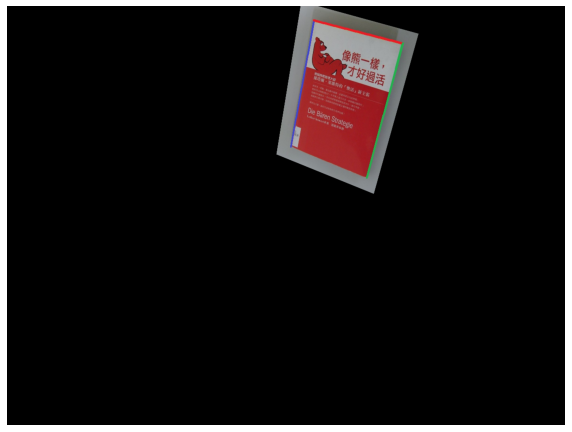

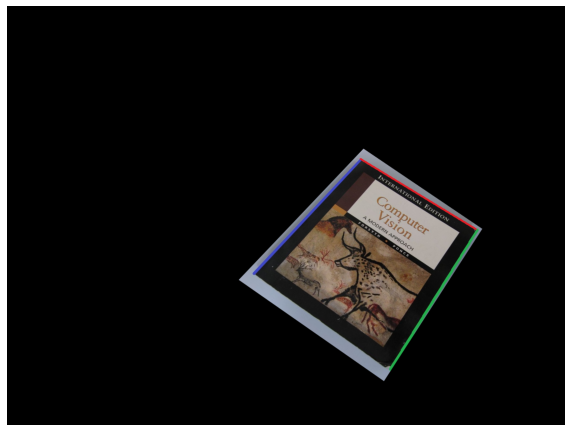

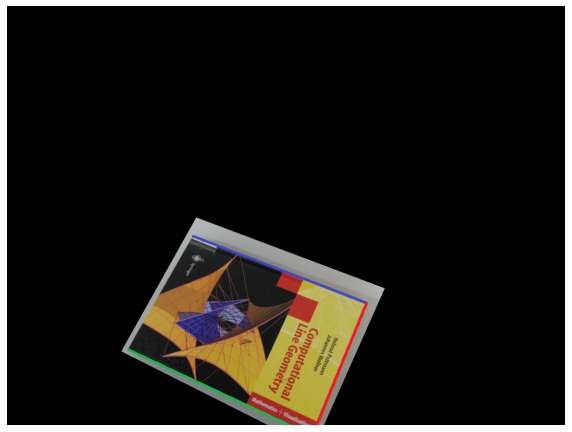

In [21]:
#######################################
# Use Homography Matrix to Wrap Image #
#######################################

Warp_and_Plot(Book1_IMG, Scene_IMG, H1)
Warp_and_Plot(Book2_IMG, Scene_IMG, H2)
Warp_and_Plot(Book3_IMG, Scene_IMG, H3)